Кочетков Михаил   Иу5-61    Рубежный контроль №1    Вариант 11

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max.columns', 100)

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer, MissingIndicator

In [2]:
data = pd.read_csv('marvel-wikia-data.csv')
data.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


In [3]:
#посмотрим на типы колонок
data.dtypes

page_id               int64
name                 object
urlslug              object
ID                   object
ALIGN                object
EYE                  object
HAIR                 object
SEX                  object
GSM                  object
ALIVE                object
APPEARANCES         float64
FIRST APPEARANCE     object
Year                float64
dtype: object

In [4]:
# проверим есть ли пропущенные значения
data.isnull().sum()

page_id                 0
name                    0
urlslug                 0
ID                   3770
ALIGN                2812
EYE                  9767
HAIR                 4264
SEX                   854
GSM                 16286
ALIVE                   3
APPEARANCES          1096
FIRST APPEARANCE      815
Year                  815
dtype: int64

In [5]:
#размер df
total_count = data.shape[0]
total_count

16376

In [6]:
# Выберем числовые колонки с пропущенными значениями
num_cols = []
total_count = data.shape[0]
for col in data.columns:
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка APPEARANCES. Тип данных float64. Количество пустых значений 1096, 6.69%.
Колонка Year. Тип данных float64. Количество пустых значений 815, 4.98%.


In [7]:
#возьмем колонку Year
# Запоминаем индексы строк с пустыми значениями
flt_index = data[data['Year'].isnull()].index
flt_index

Int64Index([   12,    38,    80,   114,   259,   310,   413,   683,   789,
              854,
            ...
            16366, 16367, 16368, 16369, 16370, 16371, 16372, 16373, 16374,
            16375],
           dtype='int64', length=815)

In [8]:
data_year = data[num_cols][['Year']]
data_year.head()

,Year
0,1962.0
1,1941.0
2,1974.0
3,1963.0
4,1950.0


In [9]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_year)
mask_missing_values_only

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [10]:
strategy='mean'

In [11]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_year)
    return data_num_imp[mask_missing_values_only]

In [12]:
new_year = pd.DataFrame({'id': flt_index,
                       'Year':test_num_impute('mean')})
new_year

,id,Year
0,12,1984.951803
1,38,1984.951803
2,80,1984.951803
3,114,1984.951803
4,259,1984.951803
...,...,...
810,16371,1984.951803
811,16372,1984.951803
812,16373,1984.951803
813,16374,1984.951803


In [13]:
for index, row in new_year.iterrows():
    data.loc[row['id'], 'Year'] = row['Year']
data
#очистили данные для колонки Year

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.000000
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.000000
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.000000
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.000000
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16371,657508,Ru'ach (Earth-616),\/Ru%27ach_(Earth-616),No Dual Identity,Bad Characters,Green Eyes,No Hair,Male Characters,NaN,Living Characters,NaN,NaN,1984.951803
16372,665474,Thane (Thanos' son) (Earth-616),\/Thane_(Thanos%27_son)_(Earth-616),No Dual Identity,Good Characters,Blue Eyes,Bald,Male Characters,NaN,Living Characters,NaN,NaN,1984.951803
16373,695217,Tinkerer (Skrull) (Earth-616),\/Tinkerer_(Skrull)_(Earth-616),Secret Identity,Bad Characters,Black Eyes,Bald,Male Characters,NaN,Living Characters,NaN,NaN,1984.951803
16374,708811,TK421 (Spiderling) (Earth-616),\/TK421_(Spiderling)_(Earth-616),Secret Identity,Neutral Characters,NaN,NaN,Male Characters,NaN,Living Characters,NaN,NaN,1984.951803


In [14]:
# Выберем категориальные колонки с пропущенными значениями
cat_cols = []
for col in data.columns:
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка ID. Тип данных object. Количество пустых значений 3770, 23.02%.
Колонка ALIGN. Тип данных object. Количество пустых значений 2812, 17.17%.
Колонка EYE. Тип данных object. Количество пустых значений 9767, 59.64%.
Колонка HAIR. Тип данных object. Количество пустых значений 4264, 26.04%.
Колонка SEX. Тип данных object. Количество пустых значений 854, 5.21%.
Колонка GSM. Тип данных object. Количество пустых значений 16286, 99.45%.
Колонка ALIVE. Тип данных object. Количество пустых значений 3, 0.02%.
Колонка FIRST APPEARANCE. Тип данных object. Количество пустых значений 815, 4.98%.


In [15]:
#для очистки возьмем столбец SEX
cat_temp_data = data[['SEX']]
cat_temp_data.head()

,SEX
0,Male Characters
1,Male Characters
2,Male Characters
3,Male Characters
4,Male Characters


In [16]:
cat_temp_data['SEX'].unique()

array(['Male Characters', 'Female Characters', 'Genderfluid Characters',
       'Agender Characters', nan], dtype=object)

In [17]:
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp = imp.fit_transform(cat_temp_data)
data_imp

array([['Male Characters'],
       ['Male Characters'],
       ['Male Characters'],
       ...,
       ['Male Characters'],
       ['Male Characters'],
       ['Male Characters']], dtype=object)

In [18]:
# Пустые значения отсутствуют
np.unique(data_imp)

array(['Agender Characters', 'Female Characters',
       'Genderfluid Characters', 'Male Characters'], dtype=object)

In [19]:
cat_enc = pd.DataFrame({'SEX':data_imp.T[0]})
cat_enc

,SEX
0,Male Characters
1,Male Characters
2,Male Characters
3,Male Characters
4,Male Characters
...,...
16371,Male Characters
16372,Male Characters
16373,Male Characters
16374,Male Characters


In [20]:
for index, row in cat_enc.iterrows():
    data.loc[index, 'SEX'] = row['SEX']
data

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.000000
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.000000
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.000000
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.000000
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16371,657508,Ru'ach (Earth-616),\/Ru%27ach_(Earth-616),No Dual Identity,Bad Characters,Green Eyes,No Hair,Male Characters,NaN,Living Characters,NaN,NaN,1984.951803
16372,665474,Thane (Thanos' son) (Earth-616),\/Thane_(Thanos%27_son)_(Earth-616),No Dual Identity,Good Characters,Blue Eyes,Bald,Male Characters,NaN,Living Characters,NaN,NaN,1984.951803
16373,695217,Tinkerer (Skrull) (Earth-616),\/Tinkerer_(Skrull)_(Earth-616),Secret Identity,Bad Characters,Black Eyes,Bald,Male Characters,NaN,Living Characters,NaN,NaN,1984.951803
16374,708811,TK421 (Spiderling) (Earth-616),\/TK421_(Spiderling)_(Earth-616),Secret Identity,Neutral Characters,NaN,NaN,Male Characters,NaN,Living Characters,NaN,NaN,1984.951803


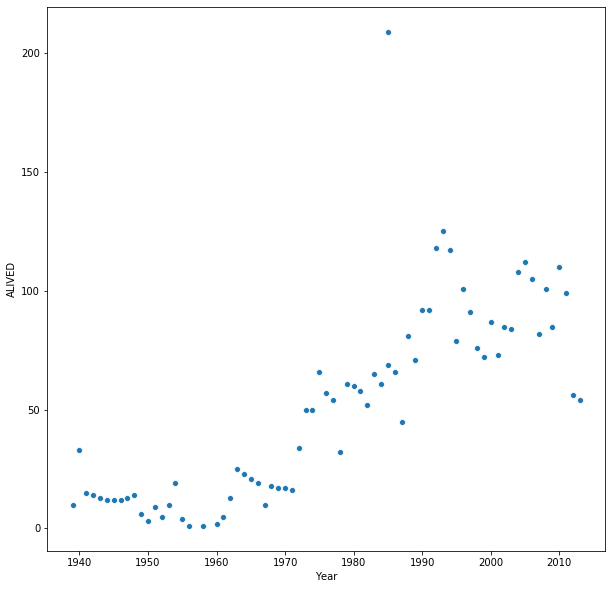

In [31]:
# Диаграмма ресеяния
# зависимость количества выживших женских персонажей от года их первого появления в комиксах

fem_df = data[data['SEX'] == 'Female Characters'].groupby('Year').count()
fem_df.reset_index(inplace=True)
fem_df['ALIVED'] = fem_df['ALIVE']
fem_df

fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='Year', y="ALIVED", data=fem_df)

Таким образом для обработки пропусков в данных для количественного признака использовался метод импьютации средними значениями, а для категорийных признаков - импьютации наиболее частыми значениями.
Для дальнейшего построения моделей можно использовать так же столбы с информацией о принадлежности к стороне героев, обработав предварительно пропуски, и в результате выстроить модель, которая дает достаточную информацию о тенденции выживаемости различных персонажей в зависимости от их пола и стороны в годы их первого появления в комиксах.